In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
C1_ch0 = pd.read_csv('/Users/emiliebertholet/cernbox/coldbox_data/LED/C1_HDconnectedBiased/C1_Apr112024_6p2V_500Hz_HDconnectedBiased_EP106_VGAIN0p4_offset1062_OIsOFF_channel0_AFE0.csv', delimiter=' ')
print(C1_ch0.shape)

C1_ch7 = pd.read_csv('/Users/emiliebertholet/cernbox/coldbox_data/LED/C1_HDconnectedBiased/C1_Apr112024_6p2V_500Hz_HDconnectedBiased_EP106_VGAIN0p4_offset1058_OIsOFF_channel7_AFE0.csv', delimiter=' ')
print(C1_ch7.shape)


(9999, 1000)
(9999, 1000)


In [4]:
C1_ch0.head()

,2076,2073,2072,2073.1,2068,2069,2071,2067,2065,2064,...,2066.64,2062.50,2062.51,2066.65,2062.52,2065.68,2067.56,2064.59,2061.50,2065.69
0,2073,2066,2065,2070,2072,2073,2070,2069,2070,2073,...,2104,2101,2111,2113,2104,2103,2099,2101,2105,2104
1,2040,2042,2044,2042,2044,2039,2039,2038,2041,2042,...,2042,2042,2047,2048,2042,2043,2048,2039,2038,2038
2,2066,2067,2066,2063,2063,2066,2063,2065,2063,2069,...,2067,2070,2067,2065,2063,2064,2067,2061,2067,2069
3,2110,2110,2112,2109,2111,2114,2112,2115,2113,2110,...,2048,2051,2051,2050,2054,2054,2050,2047,2052,2055
4,2065,2062,2065,2065,2065,2065,2069,2069,2067,2065,...,1977,1976,1970,1966,1963,1962,1961,1959,1955,1953


In [ ]:
def substract_pedestals(array_2d):
    subtracted, pedestals = [], []
    for row in array_2d:
        pedestal = np.argmax(np.bincount(row))
        subtracted.append(row - pedestal)
        pedestals.append(pedestal)
    return np.array(subtracted), np.array(pedestals)

array([[2073, 2066, 2065, ..., 2101, 2105, 2104],
       [2040, 2042, 2044, ..., 2039, 2038, 2038],
       [2066, 2067, 2066, ..., 2061, 2067, 2069],
       ...,
       [1920, 1926, 1926, ..., 1948, 1945, 1948],
       [2092, 2087, 2085, ..., 2091, 2090, 2093],
       [2100, 2096, 2100, ..., 2097, 2089, 2092]], shape=(9999, 1000))

In [10]:
C1_ch0_ped = substract_pedestals(np.array(C1_ch0))
C1_ch7_ped = substract_pedestals(np.array(C1_ch7))

In [18]:
C1_ch0_ped

(array([[ 3, -4, -5, ..., 31, 35, 34],
        [-2,  0,  2, ..., -3, -4, -4],
        [ 3,  4,  3, ..., -2,  4,  6],
        ...,
        [ 0,  6,  6, ..., 28, 25, 28],
        [ 6,  1, -1, ...,  5,  4,  7],
        [ 6,  2,  6, ...,  3, -5, -2]], shape=(9999, 1000)),
 array([2070, 2042, 2063, ..., 1920, 2086, 2094], shape=(9999,)))

In [26]:
C1_ch0_ped[1][0]

np.int64(2070)

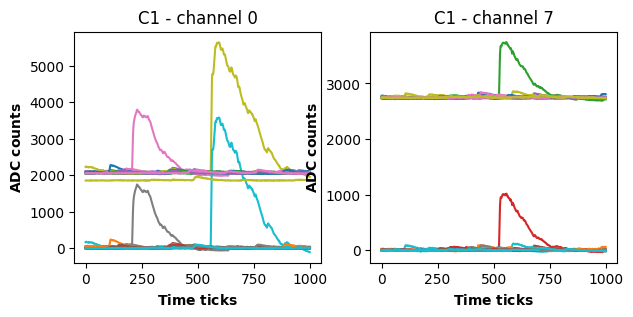

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

rg = range(0, 20)

ax = axs.flatten()[0]
for i in rg:
    ax.plot(np.arange(0, 1000, 1), C1_ch0.iloc[i].transpose())
    ax.plot(np.arange(0, 1000, 1), C1_ch0_ped[0][i].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"C1 - channel 0");

ax = axs.flatten()[1]
for i in rg:
    ax.plot(np.arange(0, 1000, 1), C1_ch7.iloc[i].transpose())
    ax.plot(np.arange(0, 1000, 1), C1_ch7_ped[0][i].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"C1 - channel 7");





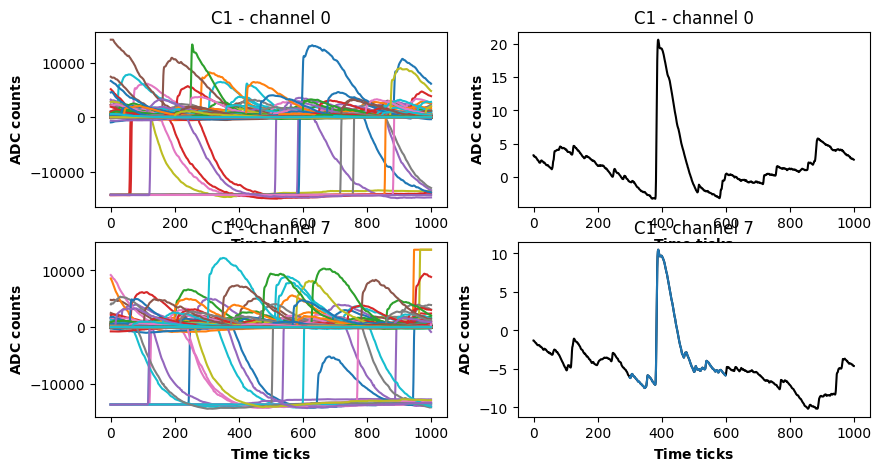

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

rg = range(0, 9000)

ax = axs.flatten()[0]
for i in rg:
    ax.plot(np.arange(0, 1000, 1), C1_ch0_ped[0][i].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"C1 - channel 0");
# ax.set_ylim(2000, 5000)

ax = axs.flatten()[1]
avg_wf_ch0= C1_ch0_ped[0].mean(axis=0)
ax.plot(np.arange(0, 1000, 1), avg_wf_ch0, color='black')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"C1 - channel 0");

ax = axs.flatten()[2]
for i in rg:
    ax.plot(np.arange(0, 1000, 1), C1_ch7_ped[0][i].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"C1 - channel 7");
# ax.set_ylim(2000, 5000)

ax = axs.flatten()[3]
avg_wf_ch7= C1_ch7_ped[0].mean(axis=0)
ax.plot(np.arange(0, 1000, 1), avg_wf_ch7, color='black')
ax.plot(np.arange(300, 600, 1), avg_wf_ch7[300:600])
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"C1 - channel 7");


# NEED TO SUBTRACT PEDESTAL!

In [ ]:
# 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def deconvolve_waveform(measured, response, regularization=1e-2):
    """
    Deconvolve a measured waveform with a known detector response.
    
    Parameters:
        measured (np.array): The measured waveform (y)
        response (np.array): The known response function (h)
        regularization (float): Small constant to avoid division by zero (acts like Tikhonov regularization)
    
    Returns:
        recovered (np.array): The deconvolved signal (x)
    """
    # Pad response to match length
    n = len(measured)
    response_padded = np.zeros(n)
    response_padded[:len(response)] = response

    # FFT
    Y = np.fft.fft(measured)
    H = np.fft.fft(response_padded)

    # Avoid divide-by-zero and reduce noise amplification
    H_conj = np.conj(H)
    H_abs2 = H * H_conj
    X = Y * H_conj / (H_abs2 + regularization)

    # Inverse FFT to get recovered signal
    recovered = np.fft.ifft(X).real
    return recovered


In [44]:
# # Example: synthetic waveform
# t = np.arange(500)
# true_signal = np.zeros_like(t)
# true_signal[100:105] = 1.0  # A square pulse (simulating scintillation light)

# # Simulated detector response (e.g., CR-(RC)^n shape)
# response = np.exp(-np.arange(50)/7.0)

# # Create measured signal by convolving
# measured = np.convolve(true_signal, response, mode='full')[:len(t)]

# # Deconvolve
# recovered = deconvolve_waveform(measured, response, regularization=1e-1)

# # Plot
# plt.figure(figsize=(10,6))
# plt.plot(measured, label="Measured waveform", linestyle='--')
# plt.plot(recovered, label="Deconvolved signal", linestyle='-.')
# plt.plot(true_signal, label="True signal")
# plt.legend()
# plt.title("Deconvolution")
# plt.xlabel("Sample")
# plt.ylabel("Amplitude")
# plt.show()


In [35]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/selected_waveforms'

with open(f'{peak_folder}/selection_cosmics_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
cosmics = pd.DataFrame(dic)
print(f"cosmics:  {cosmics.shape[0]} peaks, {cosmics.trigger_record.unique().shape[0]} trigger records")

# with open(f'{peak_folder}/selection_PNS_wlenNone_prom500.pkl', 'rb') as file:
#     dic = pickle.load(file)
# PNS = pd.DataFrame(dic)
# print(f"PNS:  {PNS.shape[0]} peaks, {PNS.trigger_record.unique().shape[0]} trigger records")

with open(f'{peak_folder}/selection_PNS_neutrons_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
PNS_neutrons = pd.DataFrame(dic)
print(f"PNS_neutrons:  {PNS_neutrons.shape[0]} peaks, {PNS_neutrons.trigger_record.unique().shape[0]} trigger records")

# with open(f'{peak_folder}/selection_PNS_SideBand_wlenNone_prom500.pkl', 'rb') as file:
#     dic = pickle.load(file)
# PNS_SB = pd.DataFrame(dic)
# print(f"PNS_SB:  {PNS_SB.shape[0]} peaks, {PNS_SB.trigger_record.unique().shape[0]} trigger records")


# cosmics, 25150 peaks, 4189 trigger records
# PNS, 46228 peaks, 14283 trigger records
# PNS_neutrons, 3780 peaks, 3187 trigger records
# PNS_SB, 39102 peaks, 13893 trigger records



# cosmics.keys()

cosmics:  25150 peaks, 4189 trigger records
PNS_neutrons:  3780 peaks, 3187 trigger records


In [36]:
def pad_waveforms(input_data, pad_length=500):
    output_data = input_data
    output_data['waveform_padded'] = [np.pad(wf, (0, pad_length - len(wf))) if len(wf) < pad_length else wf[:pad_length] for wf in output_data['waveform']]
    return output_data

cosmics      = pad_waveforms(cosmics, 400)

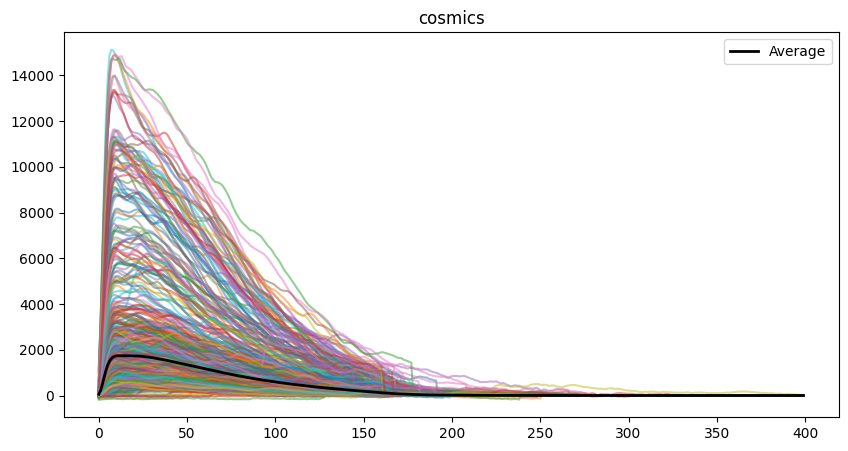

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

waveforms = np.stack(cosmics['waveform_padded'].values)
avg = np.mean(cosmics['waveform_padded'], axis=0)
for w in waveforms[:1000]:
    ax.plot(w, alpha=0.5)
ax.plot(avg, color='black', linewidth=2, label='Average')
ax.set_title('cosmics')
ax.legend();

In [47]:
cosmics.waveform[0]

array([-92, -84, -75, -84, -85, -77, -69, -66, -51, -10,  57, 138, 213,
       295, 351, 361, 357, 354, 367, 358, 323, 310, 318, 309, 296, 273,
       266, 257, 251, 262, 254, 238, 221, 221, 221, 245, 265, 284, 319,
       328, 287, 305, 334, 310, 293, 289, 294, 291, 295, 309, 312, 323,
       349, 352, 362, 369, 371, 340, 301, 329, 368, 363, 347, 374, 394,
       390, 369, 386, 405, 393, 371, 361, 370, 377, 375, 386, 391, 390,
       406, 416, 415, 413, 416, 419, 398, 389, 390, 382, 383, 382, 385,
       370, 352, 328, 284, 260, 281, 309, 323, 325, 334, 351, 364, 364,
       342, 351, 356, 342, 334, 334, 337, 349, 370, 376, 387, 370, 360,
       369, 360, 359, 346, 336, 316, 305, 310, 279, 251, 239, 234, 229,
       208, 203, 207, 188, 171, 164, 145, 123, 116, 114,  97,  78,  80,
        88,  92,  69,  49,  40,  41,  41,  34,  24,  23,  46,  77,  86,
        83,  73, 102, 103,  80,  58,  63,  55,  50,  40,  36,  30,  11,
        -1,  10,   7,   1,  -1, -15, -25, -22, -16, -28, -42, -4